# O que vende um carro?

Esse projeto visa realizar uma analise na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no  site todos os dias. Vamos estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd 


### Carregando os dados

Carregando os dados do projeto e uma olhada às informações gerais.

In [2]:
df= pd.read_csv('/datasets/vehicles_us.csv')


In [3]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [7]:
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
df.shape

(51525, 13)

In [9]:
df.value_counts().sum()

14852

In [10]:
import matplotlib.pyplot as plt


In [11]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [12]:
df.duplicated().sum()

0

    Obs:
    - Algumas colunas tem valores nulos. 
    - Algumas colunas tem valores ausentes. 
    -Não existem duplicatas. 

      - Valores Nan nas coulnas [model_year,cylinders,odometer, paint_color, is_4w].
    As colunas que tem mais dados null:
    - is_4wd
    -paint_color;
    -odometer 
    

### Conclusões e próximos passos


   *Valores Nan em 'Model_year' podem ser substituidos por alguma coluna que tenha correlação com esta, extraindo a média ou mediana dos valores.*  
   *Algumas colunas possuem dados categóricos, para alguns tipos de analise, se faz necessário a transfomação para var. numérica.*

## Lidando com valores ausentes  

In [13]:
df_nul_4wd=df['is_4wd'].isnull()
df_nul_4wd

0        False
1        False
2         True
3         True
4         True
         ...  
51520     True
51521     True
51522     True
51523     True
51524     True
Name: is_4wd, Length: 51525, dtype: bool

In [14]:
df['is_4wd']= df['is_4wd'].fillna('0')

In [15]:
df['is_4wd']

0        1.0
1        1.0
2          0
3          0
4          0
        ... 
51520      0
51521      0
51522      0
51523      0
51524      0
Name: is_4wd, Length: 51525, dtype: object

In [16]:
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [17]:
pd.unique(df['paint_color'])

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [18]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [19]:
df['odometer'].isnull().describe

<bound method NDFrame.describe of 0        False
1        False
2        False
3         True
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524     True
Name: odometer, Length: 51525, dtype: bool>

### - Substituindo Nan nas col. 'condition' e 'odometer'. 

  *-Existe uma tendência na coluna 'condition' e 'odometer' em acompanhar o ano do modelo, p/ modelos acima de 2009.*  
  Por isso os dados de 'condition' podem substituir colunas Nan em model year.

In [20]:
cond_model_year_tbl= df.pivot_table(index='condition', values='model_year',aggfunc='median')

In [21]:
cond_model_year_tbl

,model_year
condition,
excellent,2012.0
fair,2003.0
good,2009.0
like new,2014.0
new,2018.0
salvage,2005.0


   *-Existe uma tendência na coluna 'condition' e 'odometer' em acompanhar o ano do modelo, p/ modelos acima de 2009.*  
  Por isso os dados de 'condition' podem substituir colunas Nan em model year.

In [22]:
def fill_model_year(row):
    if pd.isna(row['model_year']):
        return cond_model_year_tbl['model_year'][row['condition']]
    return row['model_year']


In [23]:
df['model_year'] = df.apply(fill_model_year, axis=1)

In [24]:
df['model_year'].isna().sum()

0

In [25]:
odometer_fill_nan= df.pivot_table(index='condition', values='odometer',aggfunc='median')

In [26]:
odometer_fill_nan

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [27]:
def fill_odometer(row):
    if pd.isna(row['odometer']):
        return odometer_fill_nan['odometer'][row['condition']]
    return row['odometer']

In [28]:
df['odometer'] = df.apply(fill_odometer, axis=1)

In [29]:
df['odometer'].isna().sum()

0

## Corrijindo os tipos de dados

In [30]:
df['paint_color']=df['paint_color'].fillna('desconhecido')

In [31]:
df['model_year']

0        2011.0
1        2009.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [32]:
df['model_year'].isnull().sum()

0

In [33]:
df_no_null=df.dropna()

In [34]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46265 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         46265 non-null  int64  
 1   model_year    46265 non-null  float64
 2   model         46265 non-null  object 
 3   condition     46265 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          46265 non-null  object 
 6   odometer      46265 non-null  float64
 7   transmission  46265 non-null  object 
 8   type          46265 non-null  object 
 9   paint_color   46265 non-null  object 
 10  is_4wd        46265 non-null  object 
 11  date_posted   46265 non-null  object 
 12  days_listed   46265 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 4.9+ MB


In [35]:
df_no_null.shape

(46265, 13)

In [36]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d') 

## Enriqueçendo os dados

Adicionando fatores adicionais aos dados para tornar a análise mas fácil.

In [37]:
# Adicione valores data/hora para quando a propaganda estiver colocada

df['date_WMY']=pd.DatetimeIndex(df['date_posted']).year
df['date_WMY']

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: date_WMY, Length: 51525, dtype: int64

In [38]:
df['year_of_ad'] = df['date_posted'].dt.year

In [39]:
df['age'] = df['year_of_ad'] - df['model_year'] + 1

In [40]:
df['year_of_ad'] = df['date_posted'].dt.year

In [41]:
df['km_med_ano2']= df['odometer']/df['age']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  object        
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  date_WMY      51525 non-null  int64         
 14  year_of_ad    51525 non-null  int64         
 15  age           51525 non-null  float6

## Parâmetros fundamentais



Os principais parâmetros a serem estudados são:

- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

    -A coluna condition possui dados categóricos, para que seja plotado um gráfico com boa visibilidade dos dados, se faz necessário a transfomação para var. numérica.  

In [43]:

def cond_reclass(condition):
       
    if  condition == 'new':
        return '5'
    if  condition == 'like new' :
        return '4'
    if  condition == 'excellent' :
        return '3'
    if  condition == 'good' :
        return '2'
    if  condition == 'fair' :
        return '1'
    if  condition == 'salvage' :
        return '0'

In [44]:
df['cond_reclass'] = df['condition'].apply(cond_reclass).astype(int)
df['cond_reclass']

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: cond_reclass, Length: 51525, dtype: int64

In [45]:
df['cond_reclass'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: cond_reclass, dtype: int64

<AxesSubplot:ylabel='Frequency'>

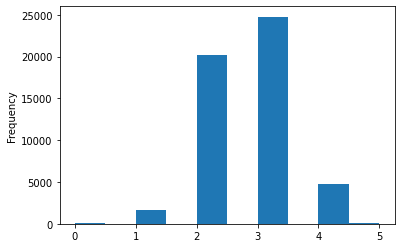

In [46]:
df['cond_reclass'].plot(kind='hist') 

   *-Os valores '0' e '5', podem ser considerados outliers e devem  filtrados em uma nova coluna.*  

In [47]:
def fill_model_year(row):
    if pd.isna(row['model_year']):
        return cond_reclass['model_year'][row['condition']]
    return row['model_year']


In [48]:
df['model_year'] = df.apply(fill_model_year, axis=1).astype(int)
df['model_year']

0        2011
1        2009
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

In [49]:
df['model_year'].describe() 

count    51525.000000
mean      2009.816419
std          6.091605
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

### Plotando os gráficos tipo 'histograma' para analise dos parâmetros

<AxesSubplot:ylabel='Frequency'>

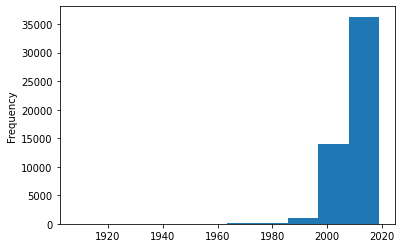

In [50]:
df['model_year'].plot(kind='hist') 

<AxesSubplot:ylabel='Frequency'>

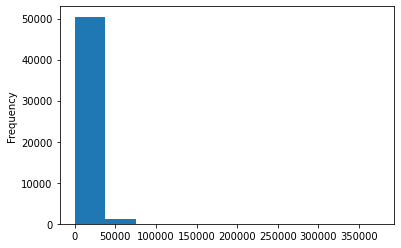

In [51]:
df['price'].plot(kind='hist') 

  -*Existe um valor grande de 'outliers'> 80000*

<AxesSubplot:ylabel='Frequency'>

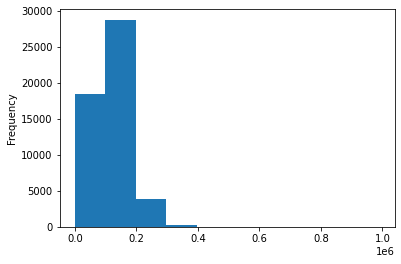

In [52]:
df['odometer'].plot(kind='hist') 

* Outliers >0.4

<AxesSubplot:ylabel='Frequency'>

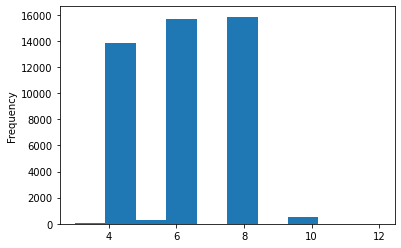

In [53]:
df['cylinders'].plot(kind='hist') 



 * Outliers >10

<AxesSubplot:ylabel='Frequency'>

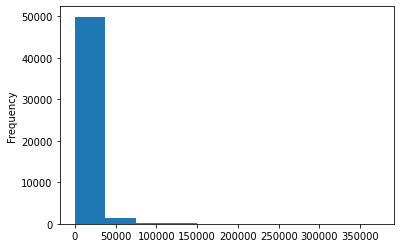

In [54]:
df['km_med_ano2'].plot(kind='hist') 


 * Outliers >80.000



   ### -*Dados a serem verificados: `model_year`, `cond_reclass`*, price
   
   

In [55]:
import matplotlib.pyplot as plt 

2007.0
2014.0


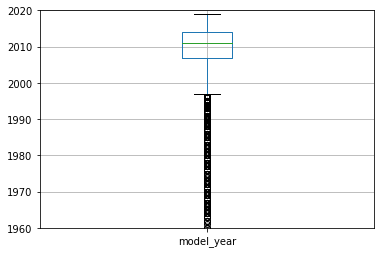

In [56]:
Q1 = df['model_year'].quantile(0.25)
Q3 = df['model_year'].quantile(0.75)

IQR_model = Q3 - Q1

df.boxplot(column='model_year')
plt.ylim(1960,2020)
print(Q1)
print(Q3)

In [57]:
limsup_model = df['model_year'].quantile(0.75)+1.5*IQR_model
limsup_model

2024.5

In [58]:
liminf_model = df['model_year'].quantile(0.25)-1.5*IQR_model
liminf_model

1996.5

In [59]:
vehicles_good = df.query('model_year<@limsup_model')


<AxesSubplot:>

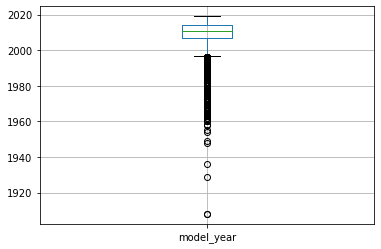

In [60]:
vehicles_good.boxplot(column='model_year')

 * #### -Examinando os outliers em cond_reclass:

In [61]:
cond_reclass

<function __main__.cond_reclass(condition)>

5000.0
16839.0


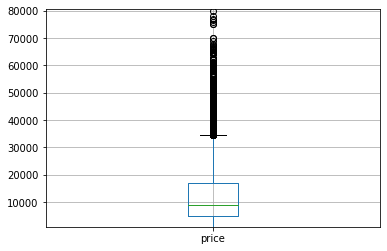

In [62]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR_price = Q3 - Q1

df.boxplot(column='price')
plt.ylim(1000, 80500)
print(Q1)
print(Q3)

In [63]:
limsup_price = df['price'].quantile(0.75)+1.5*IQR_price
limsup_price

34597.5

In [64]:
liminf_price = df['price'].quantile(0.25)-1.5*IQR_price
liminf_price

-12758.5

In [65]:
price_good = df.query('price<@limsup_price')


<AxesSubplot:>

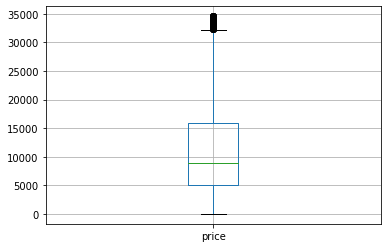

In [66]:
price_good.boxplot(column='price')

9405.888888888889
18207.714285714286


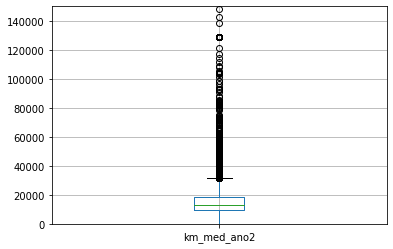

In [67]:
df['km_med_ano2']
Q1 = df['km_med_ano2'].quantile(0.25)
Q3 = df['km_med_ano2'].quantile(0.75)

IQR_price = Q3 - Q1

df.boxplot(column='km_med_ano2')
plt.ylim(0, 150000)
print(Q1)
print(Q3)

In [68]:
limsup_km_med = df['km_med_ano2'].quantile(0.75)+1.5*IQR_price
limsup_km_med

31410.45238095238

In [69]:
liminf_km_med = df['km_med_ano2'].quantile(0.25)-1.5*IQR_price
liminf_km_med

-3796.8492063492067

In [70]:
km_med_good = df.query('km_med_ano2<@limsup_km_med')


<AxesSubplot:>

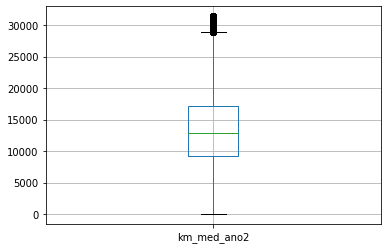

In [71]:
km_med_good.boxplot(column='km_med_ano2')

<AxesSubplot:ylabel='Frequency'>

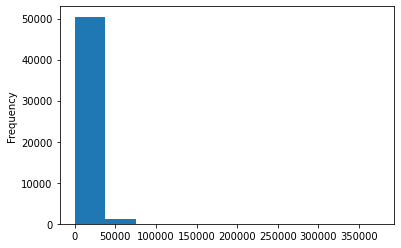

In [72]:
df['price'].plot(kind='hist') 

<AxesSubplot:ylabel='Frequency'>

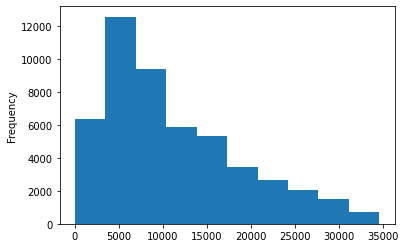

In [73]:
price_good['price'].plot(kind='hist') 

### Filtragem de categoria de carros 'bons'

 * Novo DF com 3 colunas filtradas sem os outliers:


In [74]:
df_good = df.query('(@liminf_price<price<@limsup_price) and (km_med_ano2<@limsup_km_med) and (@liminf_model<model_year<@limsup_model)') 

## Estude os parâmetros fundamentais sem valores atípicos

   -*Appós a filtragem da categoria de carros 'bons', ou seja, sem outliers em 3 colunas, os gráficos apresentaram resultados mais satisfatórios com valores mais bem dristibuidos.*

 #### *COMPARANDO GRÁFICOS E HIST. DE PRICE:*

<AxesSubplot:>

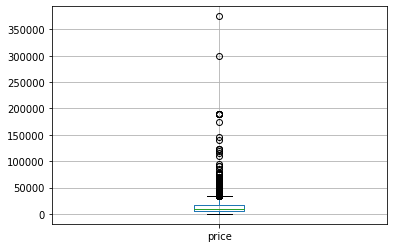

In [75]:
df.boxplot(column='price')

<AxesSubplot:>

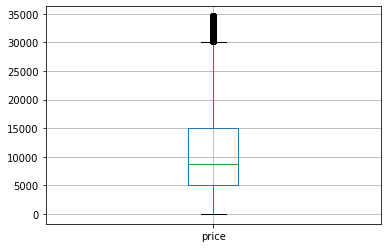

In [76]:
df_good.boxplot(column='price')

<AxesSubplot:ylabel='Frequency'>

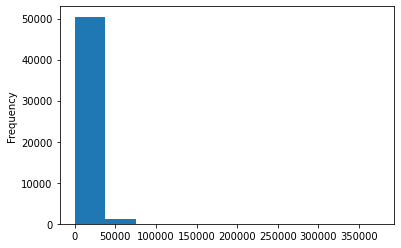

In [77]:
df['price'].plot(kind='hist') 

<AxesSubplot:ylabel='Frequency'>

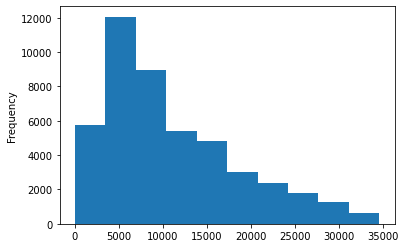

In [78]:
df_good['price'].plot(kind='hist') 

  *-Os gráficos 'filtrados' de 'price' apresentam valores mais representativos, e mais bem distribuidos para a analise.*  

<AxesSubplot:ylabel='Frequency'>

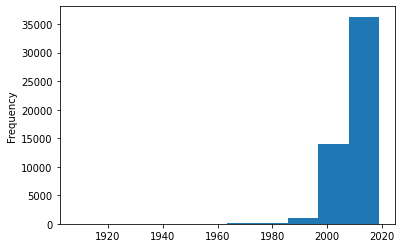

In [79]:
df['model_year'].plot(kind='hist') 

<AxesSubplot:ylabel='Frequency'>

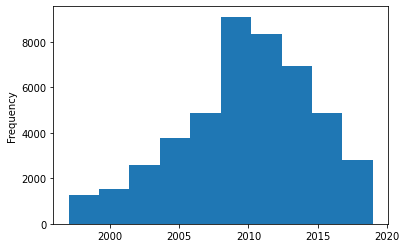

In [80]:
df_good['model_year'].plot(kind='hist') 

  *-Os gráficos 'filtrados', sem os outliers,  apresentam valores mais representativos, e mais bem distribuidos para uma possível analise.*  

## Tempo de vida das propagandas

Estudo de quantos dias propagandas foram exibidas (`days_listed`), e quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

In [81]:
import numpy as np

<AxesSubplot:ylabel='Frequency'>

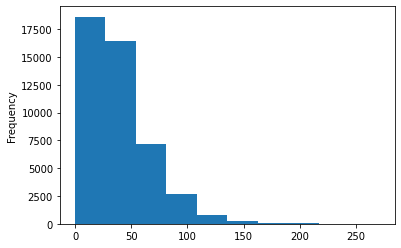

In [82]:
df_good['days_listed'].plot(kind='hist')

In [83]:
pd.cut(df_good['days_listed'], bins=5).value_counts()

(-0.271, 54.2]    35037
(54.2, 108.4]      9855
(108.4, 162.6]     1084
(162.6, 216.8]      111
(216.8, 271.0]       17
Name: days_listed, dtype: int64

In [84]:
df['faixa_days_listed']=pd.qcut(df_good['days_listed'], q=5)

In [85]:
df.groupby('faixa_days_listed')['days_listed'].mean()

faixa_days_listed
(-0.001, 16.0]    10.005019
(16.0, 27.0]      21.980654
(27.0, 40.0]      33.697920
(40.0, 59.0]      49.159677
(59.0, 271.0]     84.295077
Name: days_listed, dtype: float64

In [86]:
print('Tempo médio de dias:', df_good['days_listed'].mean())
print('Tempo mediano de dias:', df_good['days_listed'].median())

Tempo médio de dias: 39.57244490716641
Tempo mediano de dias: 33.0


In [87]:
df_good['days_listed'].describe()

count    46104.000000
mean        39.572445
std         28.228729
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

- O tempo de vida útil comum de uma propaganda é 39 dias.
- A propagandas curtas duram em média 11 dias.
- Um pequeno grupo (128) de propagandadas muito longas com mais de 110 dias.

## Média de preços por cada tipo de veículo

In [88]:
df_prop_tipo= df_good.pivot_table(index='type', values='price', aggfunc='mean' )
df_prop_tipo.sort_values(by='price', ascending=False)

,price
type,
bus,18107.428571
truck,14665.037178
pickup,14584.725121
offroad,14389.525714
coupe,13257.093766
convertible,13095.204969
SUV,10221.169947
other,10147.302326
wagon,8727.925826


In [89]:
df_prop_tipo2= df_good.pivot_table(index='type', values='age', aggfunc='count')
df_prop_tipo2.sort_values(by='age', ascending=False)

,age
type,
SUV,11433
sedan,11388
truck,10544
pickup,5999
coupe,1909
wagon,1483
mini-van,1090
hatchback,978
van,547


In [90]:
tabela_join= df_prop_tipo.join(df_prop_tipo2)
tabela_join.columns= ['preco_med', 'count']

In [91]:
tabela_join.sort_values(by='count', ascending=False)

,preco_med,count
type,,
SUV,10221.169947,11433
sedan,6740.053741,11388
truck,14665.037178,10544
pickup,14584.725121,5999
coupe,13257.093766,1909
wagon,8727.925826,1483
mini-van,7658.291743,1090
hatchback,6629.025562,978
van,8356.859232,547


 - A classe 'bus' tem < de 50, deve ser removida por não ser significativa e para não afetar a analise.           
* Os 2 tipos com mais propagandas são SUV e SEDAN.
* Apesar das 2 classes citadas serem as que mais aparecem, a faixa de preço são distintas, mostrando que a correlação entre preço x anúncios não parece ser tão confiavel.  

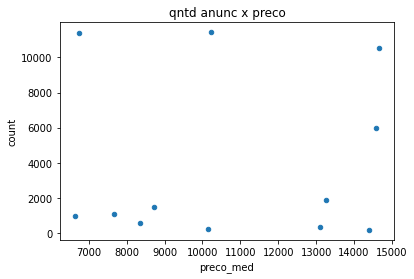

In [92]:
tabela_join.query('count>50').plot(x='preco_med', y='count', kind='scatter',title= 'qntd anunc x preco', ) ;

In [93]:
tabela_join.query('count>8000')

,preco_med,count
type,,
SUV,10221.169947,11433
sedan,6740.053741,11388
truck,14665.037178,10544


In [94]:
tabela_join.query('count<2000' and 'preco_med<9000')

,preco_med,count
type,,
hatchback,6629.025562,978
mini-van,7658.291743,1090
sedan,6740.053741,11388
van,8356.859232,547
wagon,8727.925826,1483


In [95]:
tabela_join['preco_med'].corr(tabela_join['count'])

-0.08568607917739982

    Esse gráfico mostra que existe uma pequena correlação para alguns dados, mas porém em algumas poucas classes essa correlação não é tão significativa , como em 'sedan' que tem um preço baixo mas muitos anuncios. 

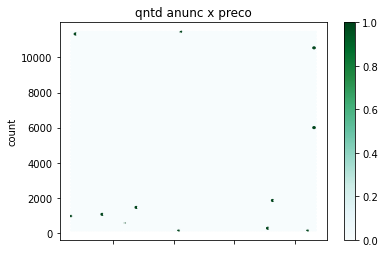

In [96]:
tabela_join.query('count>50').plot(x='preco_med', y='count', kind='hexbin',title= 'qntd anunc x preco', ) ;

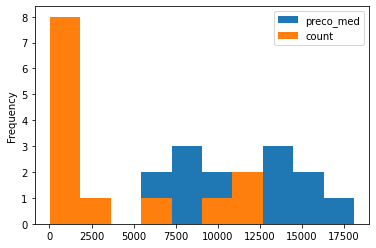

In [97]:
tabela_join.plot.hist();

<AxesSubplot:xlabel='preco_med', ylabel='count'>

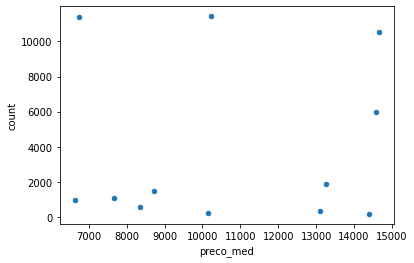

In [98]:
tabela_join.query('count > 50').plot(x='preco_med', y='count', kind='scatter')

## Fatores de preço

Quais fatores impactam mais o preço? 

In [99]:
sedan_data= df.query('type== "sedan"')
sedan_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_WMY,year_of_ad,age,km_med_ano2,cond_reclass,faixa_days_listed
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,2019,7.0,15714.285714,4,"(59.0, 271.0]"
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2019,3.0,26967.666667,3,"(27.0, 40.0]"
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,2018,5.0,11590.800000,3,"(-0.001, 16.0]"
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,2018,2018,4.0,19803.000000,3,"(59.0, 271.0]"
11,8990,2012,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0,2019-03-28,29,2019,2019,8.0,13892.750000,3,"(27.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2018,2018,6.0,14689.333333,4,"(27.0, 40.0]"
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2018,2018,17.0,10676.470588,0,"(16.0, 27.0]"
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2018,2018,10.0,12800.000000,3,"(27.0, 40.0]"
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2018,2018,6.0,23262.166667,2,"(59.0, 271.0]"


In [100]:
SUV_data= df.query('type == "SUV"')


In [101]:
sedan_cat = sedan_data[[ 'transmission', 'paint_color', 'price']]
sedan_cat

,transmission,paint_color,price
2,automatic,red,5500
4,automatic,black,14900
5,automatic,black,14990
6,automatic,white,12990
11,automatic,grey,8990
...,...,...,...
51520,automatic,black,9249
51521,automatic,white,2700
51522,automatic,blue,3950
51523,automatic,black,7455


 ### - Plotando e analisando variaveis categóricas para as classe 'sedan' e 'SUV':

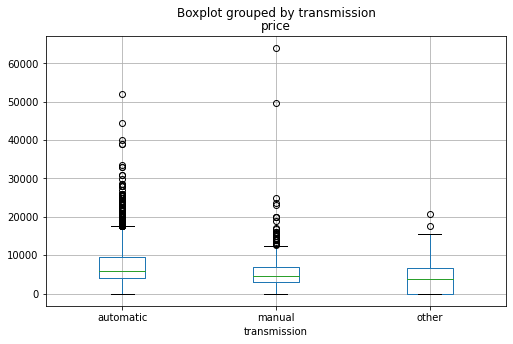

In [102]:
sedan_cat.boxplot(column='price', by='transmission', figsize=(8,5))
plt.show()

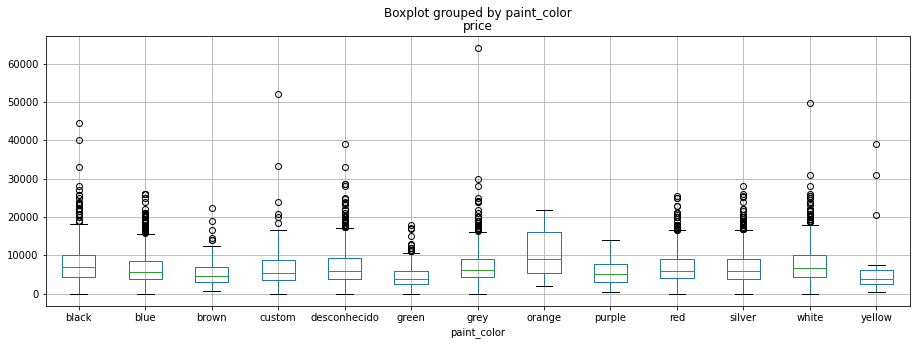

In [103]:
sedan_cat.boxplot(column='price', by='paint_color', figsize=(15,5))
plt.show()

    A analise dos diagramas de caixa, permitem as seguintes afirmativas:
 - Carros automáticos tem preço maior 
 - Carros brancos tem o maior preço, e verde menor.  
 - Algumas cores tem carros com valores 'discrepantes'( anomâlos ou muito altos).
 - Algumas classes não possuem um numero suficiente de dados para uma Analise.

 ### - Plotando variaveis numéricas para a classe 'sedan' e 'SUV':

In [104]:
sedan_num = sedan_data[[ 'age', 'km_med_ano2', 'cond_reclass','price']]


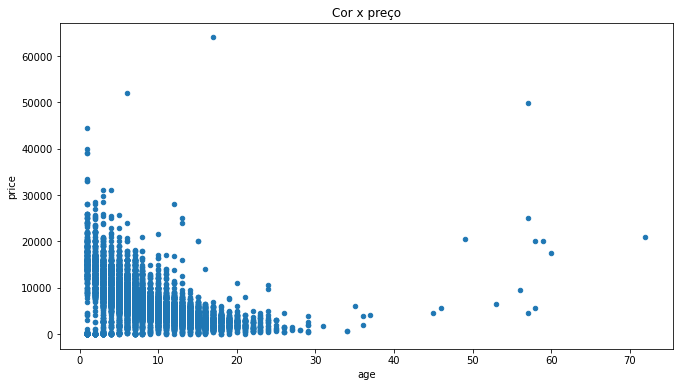

In [105]:
sedan_num.plot(x='age', y='price', kind='scatter',title= 'Cor x preço', figsize= (11, 6) ) ;

    Esse gráfico ficou interessante, mostra a correlação dierata (decrescente) do Ano do carro com o preço

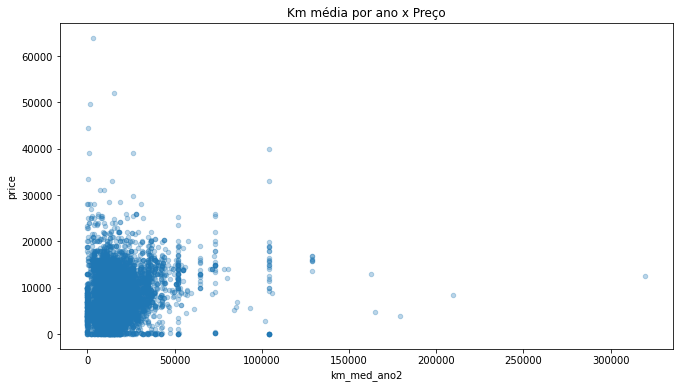

In [106]:
sedan_num.plot(x='km_med_ano2', y='price', kind='scatter',title= 'Km média por ano x Preço', figsize= (11, 6), alpha=0.3 ) ;

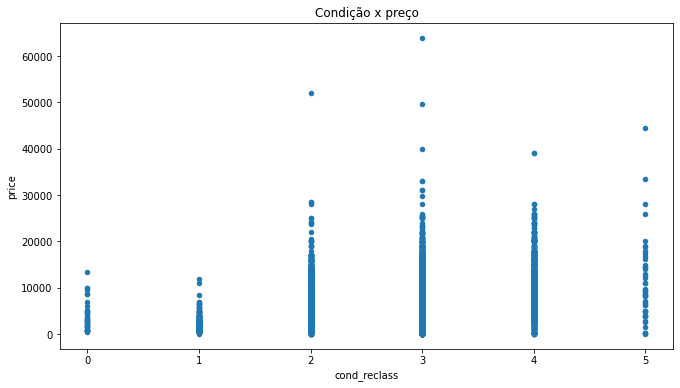

In [107]:
sedan_num.plot(x='cond_reclass', y='price', kind='scatter',title= 'Condição x preço', figsize= (11, 6) ) ;

   *Esse gráfico também apresentou uma boa correlação, dessa vez de forma crescente, porem só até a classe 4 (carros como novos).*  

In [108]:
SUV_num = SUV_data[[ 'age', 'km_med_ano2', 'cond_reclass','price']]


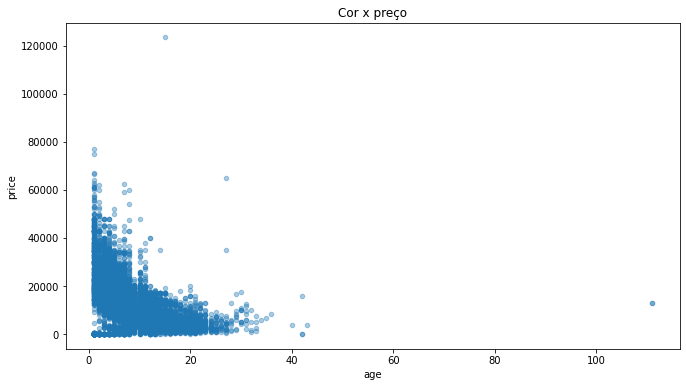

In [109]:
SUV_num.plot(x='age', y='price', kind='scatter',title= 'Cor x preço', figsize= (11, 6), alpha=0.38 ) ;

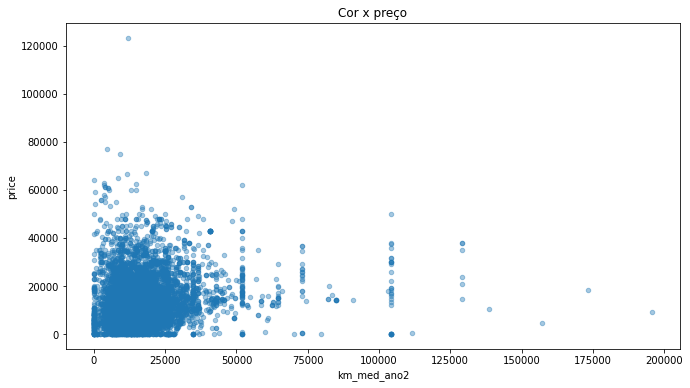

In [110]:
SUV_num.plot(x='km_med_ano2', y='price', kind='scatter',title= 'Cor x preço', figsize= (11, 6), alpha=0.4 ) ;

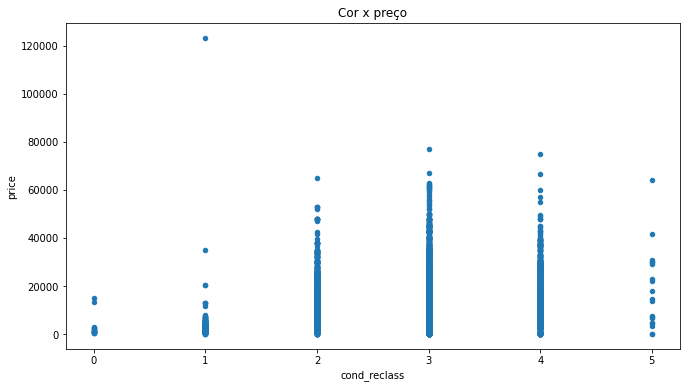

In [111]:
SUV_num.plot(x='cond_reclass', y='price', kind='scatter',title= 'Cor x preço', figsize= (11, 6) ) ;

## Conclusão geral



   O 'dataset' possiu uma quantidade significativa de colunas e de dados, muitas com informações importantes para uma analise de preço dos anúncios. Antes porém, foi necessário um pré-processamento dos dados, ja que existia alguns dados ausentes e duplicados. 
    - Transformação de algumas classes, para permitir uma analise de correlação se faz necessário a utilização de variáveis numéricas, como no caso da classe 'condition'.
    - Agrupamento de alguns dados tabém permitiu a geração de gráficos mais representativos e de fácil v  isualização. 
 - Remoção de outliers foi importante, e deve se dar ja que o conjunto de dados tem uma peculiaridade, pelo fato de que o mercado de carros é muito variado, sendo assim algumas classes que podem representar casos peculíares (carros antigos, de coleção, etc...) atrapalham na distribuição e representatividade do valor comercial da maioria dos tipos de carro.   
 
* A analise dos diagramas de caixa, permitem as seguintes afirmativas:
   - Carros automáticos tem preço maior 
   - Carros brancos tem o maior preço, e verde menor.  
   - Algumas cores tem carros com valores 'discrepantes'( anomâlos ou muito altos).
   - Algumas classes não possuem um numero suficiente de dados para uma Analise.

* A analise dos histogramas, permitem as seguintes afirmativas:
 - Existe uma forte correlação decrescente entre o preço e a idade. 
 - Acorrelação entre a km média por ano não é tão forte pois existem carros com alta km e alto valor (coleção, etc..), porém existe mais com carros até 30 mil km (maioria dos dados).  
  - Existe uma forte correlação crescente entre o preço e a categoria (até a classe 4, carros novos). 

